## The Monty Hall Problem

The Monty-Hall probability problem is a probabability question which is posited in this form

"Imagine you're on a game show, and there are three doors. Behind one door is a car, and behind the other two are goats. You pick a door, say Door 1, and the host, who knows what's behind each door, opens another door, say Door 3, revealing a goat. Now, the host gives you a choice: stick with your original choice or switch to the other unopened door, Door 2. What do you do, and why?"

By designing an experiment with repeated trials, it is possible to see if the probabiliy of success 'shifts' to the other door when the host opens an empty door and if the geust in the game show should also change their choice.

In [23]:
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt

In [31]:


findings = []
#A game function that will capture if whether a contestant wins when they change their choice.
def game_function():
    doors = ["door1", "door2", "door3"]
    car_door = random.choice(doors)
    geust_selected_door = random.choice(doors)
    remaining_unselected_doors = [x for x in doors if x != geust_selected_door]
    no_car_and_not_selected = [x for x in doors if x != car_door and x != geust_selected_door]
    host_opened_door = random.choice(no_car_and_not_selected)
    host_and_geust_selected = [host_opened_door] + [geust_selected_door]
    #Simulating the geust always switching. 
    switched_selected_door = [x for x in doors if x not in host_and_geust_selected]
    if switched_selected_door == [car_door]:
        findings.append(1)
    else:
        findings.append(0)

##Creating a data frame with tries and probabilities
reps = []
probabilities = []
#repeating the outcome of the experiment numerous times so as to minimize the standard error
for i in range(0, 10001, 20):
    for j in range(20):
        game_function()
        probabilities.append(sum(findings)/len(findings))
        reps.append(i)
        data = {
            "repetitions": reps,
            "probabilities": probabilities
        }
    
df = pd.DataFrame(data)
df

,repetitions,probabilities
0,0,1.000000
1,0,0.500000
2,0,0.333333
3,0,0.500000
4,0,0.400000
...,...,...
10015,10000,0.670727
10016,10000,0.670760
10017,10000,0.670793
10018,10000,0.670825


Text(0.5, 1.0, 'Probability Visualization')

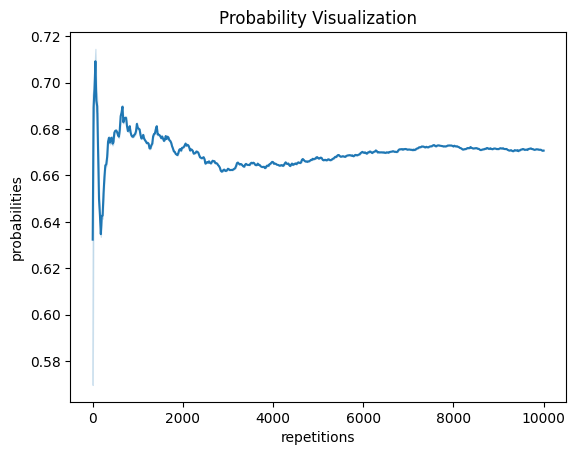

In [32]:
sns.lineplot(x = df["repetitions"], y = df["probabilities"], data = df)
plt.title("Probability Visualization")

## Result
In the beginning the probabability of opening a random door and getting a car is 1/3 (33%). When the presenter shows one door without a car and now there are two options options remaining, the probabaility of your first choice does not change and remains 1/3 (33%). On the other hand, he probability the car is behind the remaining door is (2/3) 67%. The contestant should always then make the right choice and change thier choice under such a scenario. The graph also shows with more reps, the probabability of winning gets 67%.